# 比赛数据探查

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
train_df = pd.read_table('/Users/yuhua/先验CTR模型线上观察/Alimama比赛/round1_ijcai_18_train_20180301.txt',sep=' ')
test_df = pd.read_table('/Users/yuhua/先验CTR模型线上观察/Alimama比赛/round1_ijcai_18_test_a_20180301.txt',sep=' ')

In [2]:
train_df[train_df['shop_review_positive_rate'] == -1].describe()

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,context_timestamp,context_page_id,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000,7.000000,7.0,7.000000,7.000000e+00,7.0,...,7.000000e+00,7.000000,7.000000e+00,7.0,7.0,7.0,7.0,7.0,7.0,7.0
mean,3.403412e+18,2.839587e+18,6.330816e+18,5.009513e+18,5.714286,-0.285714,0.0,7.428571,5.675891e+18,0.0,...,1.537521e+09,4006.142857,5.426170e+18,0.0,-1.0,4999.0,-1.0,-1.0,-1.0,0.0
std,2.172489e+18,8.986559e+17,2.602034e+18,1.207039e+18,1.603567,1.253566,0.0,0.975900,2.342378e+18,0.0,...,2.072376e+05,6.890297,2.626432e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,9.180339e+17,2.118953e+18,7.393828e+17,3.910416e+18,4.000000,-1.000000,0.0,6.000000,2.789891e+18,0.0,...,1.537287e+09,4001.000000,1.905230e+18,0.0,-1.0,4999.0,-1.0,-1.0,-1.0,0.0
25%,1.782287e+18,2.120643e+18,6.111596e+18,4.433348e+18,4.500000,-1.000000,0.0,7.000000,4.143827e+18,0.0,...,1.537363e+09,4001.000000,3.177536e+18,0.0,-1.0,4999.0,-1.0,-1.0,-1.0,0.0
50%,2.392765e+18,2.122332e+18,7.838285e+18,4.918413e+18,5.000000,-1.000000,0.0,8.000000,4.496964e+18,0.0,...,1.537514e+09,4001.000000,7.106980e+18,0.0,-1.0,4999.0,-1.0,-1.0,-1.0,0.0
75%,5.339496e+18,3.747290e+18,7.838285e+18,4.918413e+18,7.000000,0.000000,0.0,8.000000,7.636156e+18,0.0,...,1.537662e+09,4011.500000,7.430721e+18,0.0,-1.0,4999.0,-1.0,-1.0,-1.0,0.0
max,6.269521e+18,3.899960e+18,7.838285e+18,7.534239e+18,8.000000,2.000000,0.0,8.000000,8.884412e+18,0.0,...,1.537792e+09,4016.000000,7.754462e+18,0.0,-1.0,4999.0,-1.0,-1.0,-1.0,0.0


## id特征分布情况

#### 普通id特征
1. instance_id          样本编号，Long
2. item_id              广告商品编号，Long类型
3. user_id              用户的编号，Long类型
4. context_id           上下文信息的编号，Long类型
5. shop_id              店铺的编号，Long类型
6. item_brand_id        广告商品的品牌编号，Long类型
7. item_city_id         广告商品的城市编号，Long类型
8. user_occupation_id   用户的预测职业编号，Int类型
9. context_page_id      广告商品的展示页面编号，Int类型；取值从1开始，依次增加；在一次搜索的展示结果中第一屏的编号为1，第二屏的编号为2

#### 特殊镶嵌id特征
1. predict_category_property    根据查询词预测的类目属性列表，String类型
2. item_property_list           广告商品的属性列表，String类型
3. item_category_list           广告商品的的类目列表，String类型

*处理方法*:
- 直方图, id分布情况
- id计数

In [3]:
##########
# 特殊id处理
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

spec_id_list = ['predict_category_property', 'item_property_list', 'item_category_list']

def kv_split(row, count_set):
    if not row or len(row) < 1:
        return
    
    for kv in row.split(';'):
        k = kv.split(':')
        if k[0] not in count_set:
            count_set[k[0]] = 1
        else:
            count_set[k[0]] = count_set[k[0]] + 1
    return len(count_set)

dfs = []
cols = []
print('special id value counts:')
for i, col in enumerate(train_df[spec_id_list]):
    count_set = {}
    train_df[col].apply(lambda row: kv_split(row, count_set))
    print(col + ' value count: ' + str(len(count_set)))
    
    df = pd.Series(count_set).reset_index()
    df.columns = ['k', 'v']
    dfs.append(df)
    cols.append(col)

special id value counts:
predict_category_property value count: 1032
item_property_list value count: 61407
item_category_list value count: 16


In [45]:
import numpy as np
from sklearn import preprocessing
def norm(df, numerical):
    #对数值列归一化

    for num in numerical:
        d = df[[num]].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
        df = df.drop(num, axis=1)
        df[num] = d

    return df

def fillempty(df, val, numerical):
    for num in numerical:
        df[num] = df[num].map(lambda x: val if x < 0 else x )

    return df

def mov2pos(df, numerical):
    for num in numerical:
        df[num] += df[num].min()

    return df

def scale(df, idCol):
    min_max_scaler = preprocessing.StandardScaler()
    a = min_max_scaler.fit_transform(df[idCol].values.reshape(-1, 1))
    return pd.Series(a.reshape(1, -1)[0])

def norms_scale(df, cols):
    for col in cols:
        df[col] = scale(df, col)
    return df

nums = ['instance_id','context_id','user_id','item_id','shop_id','item_brand_id','item_city_id','item_price_level','item_sales_level','item_collected_level','item_pv_level','user_gender_id','user_age_level','user_occupation_id','user_star_level','context_page_id','shop_review_num_level','shop_star_level','shop_review_positive_rate','shop_score_service','shop_score_delivery','shop_score_description']

train_df = fillempty(train_df, -0.00000000001, nums)
train_df = mov2pos(train_df, nums)
train_df = norm(train_df, nums)

# tmp = norm(train_df.copy(), nums)
# train_df = norms_scale(train_df, nums)

# train_df

In [40]:
train_df.describe()

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,context_timestamp,context_page_id,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
count,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,...,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,478138.000000
mean,-1.330109e-16,5.158982e-16,-2.795648e-15,-8.139152e-15,2.991535e-14,-3.708305e-14,-3.920071e-14,-1.134001e-13,-2.352904e-16,7.118654e-15,...,1.537502e+09,5.106686e-14,7.524990e-15,-5.219923e-16,-9.587778e-15,-1.225200e-13,-2.475612e-16,-1.969411e-14,-1.573787e-15,0.018867
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.726222e+05,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.136055
min,-1.731997e+00,-1.695090e+00,-1.795506e+00,-2.231518e+00,-6.223098e+00,-4.686949e+00,-4.884992e+00,-7.927218e+00,-1.730841e+00,-2.356811e+00,...,1.537200e+09,-5.876964e-01,-1.822838e+00,-5.581143e+00,-1.666244e+02,-5.470981e+00,-8.276004e+01,-8.287619e+01,-7.891763e+01,0.000000
25%,-8.652475e-01,-8.647289e-01,-9.205438e-01,-6.297012e-01,-7.136361e-01,-4.379694e-01,-4.802512e-01,-5.223558e-01,-8.662402e-01,-4.139263e-01,...,1.537351e+09,-5.876964e-01,-8.610169e-01,-6.259014e-01,-1.712956e-01,-4.535879e-01,-1.999943e-01,-2.024032e-01,-2.235726e-01,0.000000
50%,1.484517e-04,1.536770e-02,7.889246e-02,5.022006e-01,2.046074e-01,-5.169850e-02,-7.982021e-02,-5.955187e-02,-5.161541e-04,-4.139263e-01,...,1.537506e+09,-5.876964e-01,-4.015673e-02,8.199032e-02,4.318595e-01,-6.763454e-02,5.134335e-02,4.597845e-02,1.450410e-01,0.000000
75%,8.665139e-01,8.901898e-01,1.012034e+00,8.251193e-01,1.122851e+00,7.208432e-01,7.210417e-01,8.660560e-01,8.652668e-01,-4.139263e-01,...,1.537635e+09,1.586270e-01,7.730185e-01,4.359362e-01,4.318595e-01,7.042722e-01,2.812161e-01,2.725950e-01,3.507321e-01,0.000000
max,1.730946e+00,1.707426e+00,1.626848e+00,1.481148e+00,9.387043e+00,2.265927e+00,1.922335e+00,1.791664e+00,1.732208e+00,3.471843e+00,...,1.537805e+09,4.139019e+00,1.728326e+00,3.267503e+00,4.318595e-01,2.634039e+00,1.212404e+00,1.240869e+00,1.004503e+00,1.000000


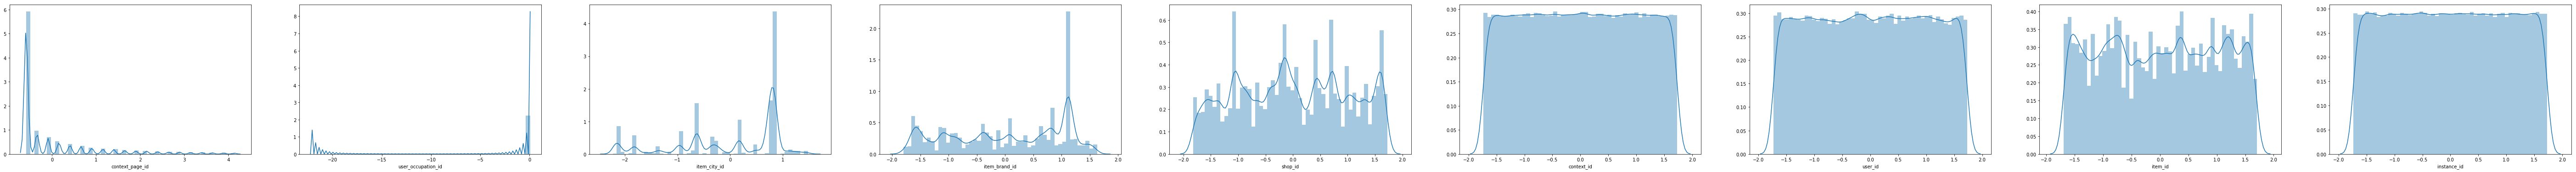

In [41]:
#############
# 查看id属性的直方图
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(1, 9, figsize=(100, 6))
sns.distplot(train_df['context_page_id'], ax=ax1)
sns.distplot(train_df['user_occupation_id'], ax=ax2)
sns.distplot(train_df['item_city_id'], ax=ax3)
sns.distplot(train_df['item_brand_id'], ax=ax4)
sns.distplot(train_df['shop_id'], ax=ax5)
sns.distplot(train_df['context_id'], ax=ax6)
sns.distplot(train_df['user_id'], ax=ax7)
sns.distplot(train_df['item_id'], ax=ax8)
sns.distplot(train_df['instance_id'], ax=ax9)

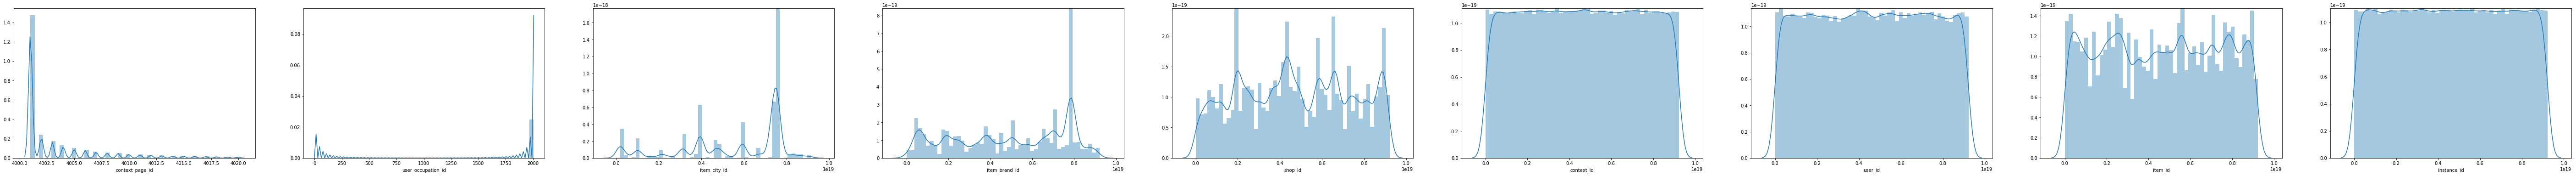

In [4]:
#############
# 查看id属性的直方图
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(1, 9, figsize=(100, 6))
sns.distplot(train_df['context_page_id'], ax=ax1)
sns.distplot(train_df['user_occupation_id'], ax=ax2)
sns.distplot(train_df['item_city_id'], ax=ax3)
sns.distplot(train_df['item_brand_id'], ax=ax4)
sns.distplot(train_df['shop_id'], ax=ax5)
sns.distplot(train_df['context_id'], ax=ax6)
sns.distplot(train_df['user_id'], ax=ax7)
sns.distplot(train_df['item_id'], ax=ax8)
sns.distplot(train_df['instance_id'], ax=ax9)

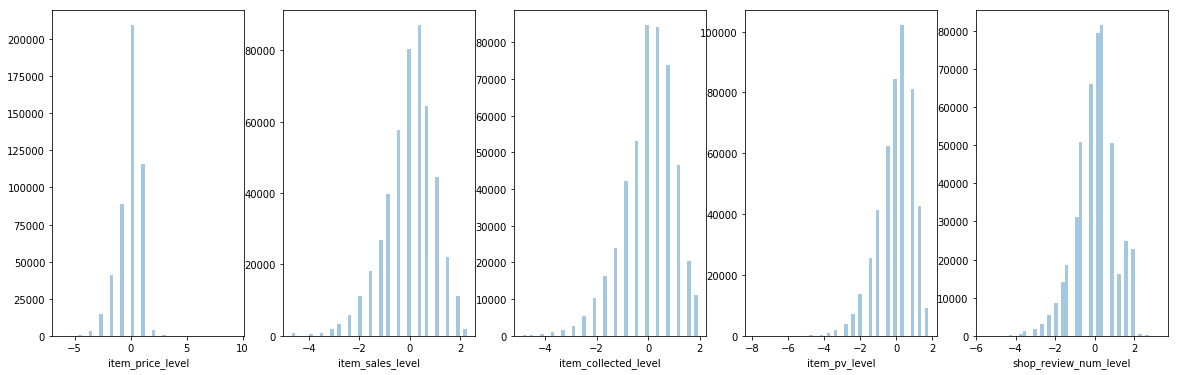

In [42]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 6))
sns.distplot(train_df['item_price_level'], kde=False, ax=ax1)
sns.distplot(train_df['item_sales_level'], kde=False, ax=ax2)
sns.distplot(train_df['item_collected_level'], kde=False, ax=ax3)
sns.distplot(train_df['item_pv_level'], kde=False, ax=ax4)
sns.distplot(train_df['shop_review_num_level'], kde=False, ax=ax5)

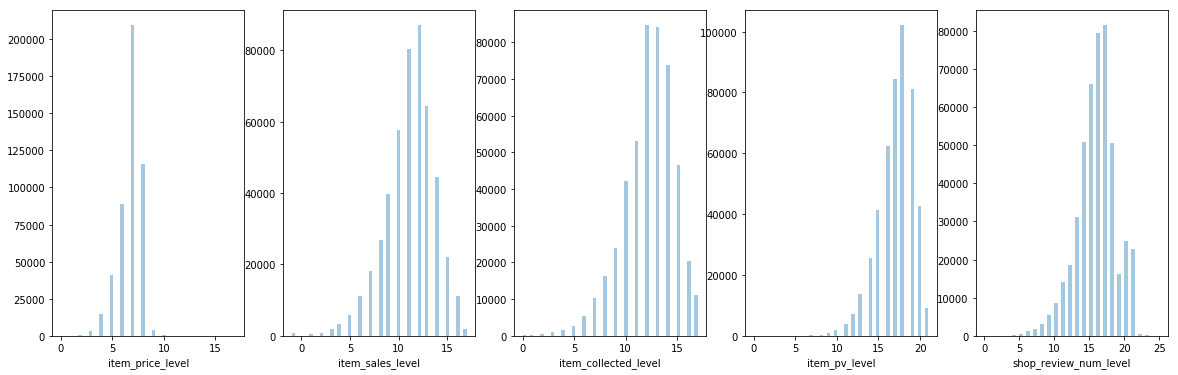

In [5]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 6))
sns.distplot(train_df['item_price_level'], kde=False, ax=ax1)
sns.distplot(train_df['item_sales_level'], kde=False, ax=ax2)
sns.distplot(train_df['item_collected_level'], kde=False, ax=ax3)
sns.distplot(train_df['item_pv_level'], kde=False, ax=ax4)
sns.distplot(train_df['shop_review_num_level'], kde=False, ax=ax5)

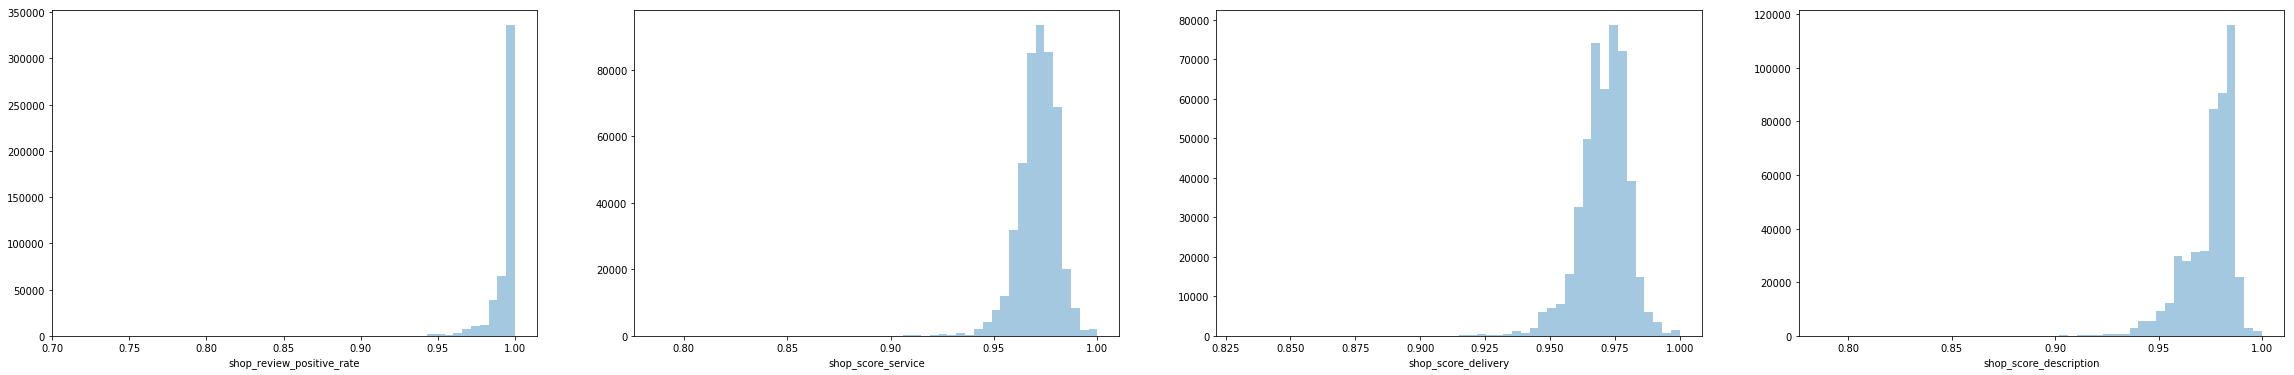

In [46]:
# 尚未归一化
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(40, 6))
sns.distplot(train_df[train_df['shop_review_positive_rate']>0]['shop_review_positive_rate'], kde=False, ax=ax1)
sns.distplot(train_df[train_df['shop_score_service']>0]['shop_score_service'], kde=False, ax=ax2)
sns.distplot(train_df[train_df['shop_score_delivery']>0]['shop_score_delivery'], kde=False, ax=ax3)
sns.distplot(train_df[train_df['shop_score_description']>0]['shop_score_description'], kde=False, ax=ax4)

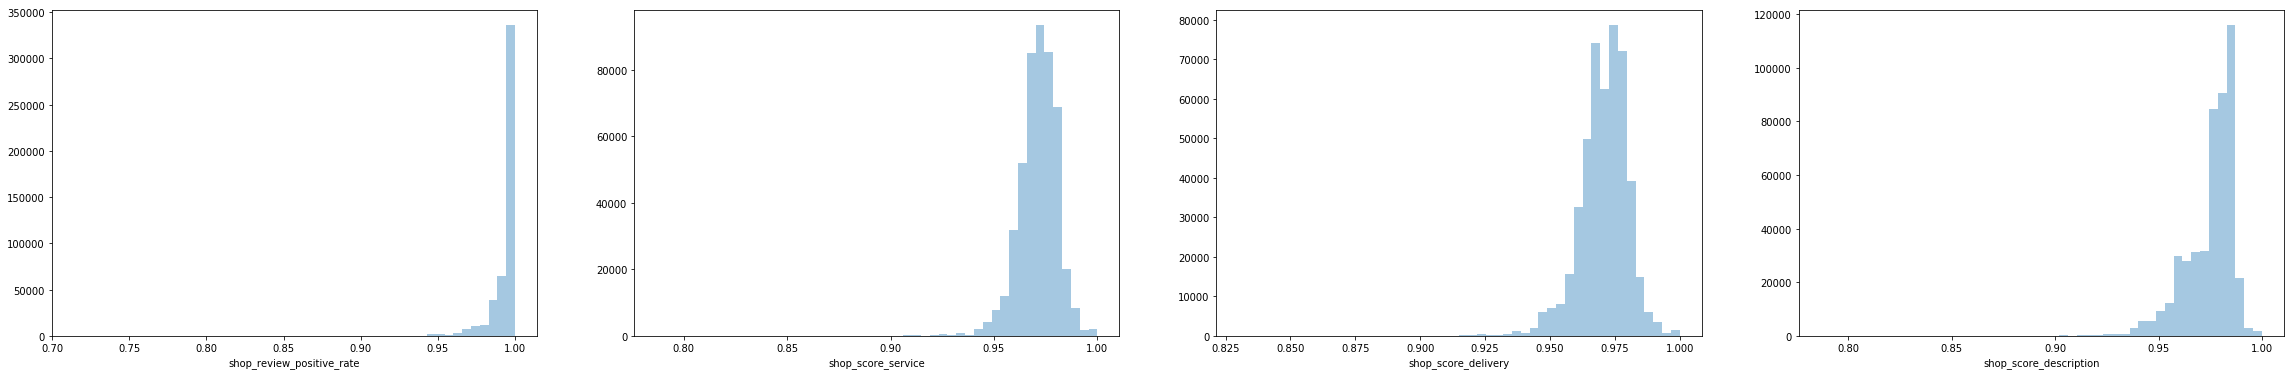

In [13]:
# 尚未归一化
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(40, 6))
sns.distplot(train_df[train_df['shop_review_positive_rate']>0]['shop_review_positive_rate'], kde=False, ax=ax1)
sns.distplot(train_df[train_df['shop_score_service']>0]['shop_score_service'], kde=False, ax=ax2)
sns.distplot(train_df[train_df['shop_score_delivery']>0]['shop_score_delivery'], kde=False, ax=ax3)
sns.distplot(train_df[train_df['shop_score_description']>0]['shop_score_description'], kde=False, ax=ax4)

In [6]:
###########
# 查看id属性的计数

id_list = ['item_price_level', 'item_collected_level', 'item_pv_level', 'shop_review_num_level', 'item_sales_level', 'context_page_id', 'item_city_id', 'item_brand_id', 'shop_id', 'context_id', 'user_id', 'item_id', 'instance_id']
for col in train_df[id_list]:
    count = train_df.agg({col: lambda x: x.nunique()}).values[0]
    print(col + ' value counts: ' + str(count))

item_price_level value counts: 14
item_collected_level value counts: 18
item_pv_level value counts: 22
shop_review_num_level value counts: 25
item_sales_level value counts: 18
context_page_id value counts: 20
item_city_id value counts: 128
item_brand_id value counts: 2055
shop_id value counts: 3959
context_id value counts: 478111
user_id value counts: 197694
item_id value counts: 10075
instance_id value counts: 478087


## 数据相关性探查

In [7]:
##########
# 列举与目标值相关的单特征
train_df.corr()['is_trade']

instance_id                 -0.002158
item_id                     -0.000168
item_brand_id               -0.005311
item_city_id                -0.014622
item_price_level            -0.055895
item_sales_level             0.037358
item_collected_level         0.013972
item_pv_level                0.006077
user_id                      0.000255
user_gender_id               0.008843
user_age_level               0.002628
user_occupation_id           0.002026
user_star_level              0.002239
context_id                  -0.003459
context_timestamp           -0.009274
context_page_id             -0.012313
shop_id                     -0.003238
shop_review_num_level       -0.000747
shop_review_positive_rate   -0.017355
shop_star_level             -0.000735
shop_score_service          -0.015578
shop_score_delivery         -0.016239
shop_score_description      -0.016734
is_trade                     1.000000
Name: is_trade, dtype: float64

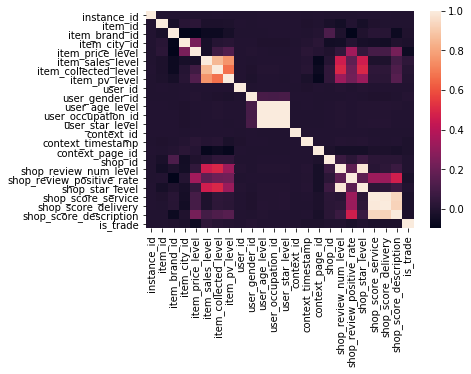

In [8]:
# 两两特征相关的热度图
corr = train_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## 连续特征探查

1. item_price_level           广告商品的价格等级，Int类型
2. item_sales_level           广告商品的销量等级，Int类型
3. item_collected_level       广告商品被收藏次数的等级，Int类型
4. item_pv_level              广告商品被展示次数的等级，Int类型
5. user_age_level             用户的预测年龄等级，Int类型
6. user_star_level            用户的星级编号，Int类型
7. shop_review_num_level      店铺的评价数量等级，Int类型
8. shop_review_positive_rate  店铺的好评率，Double类型
9. shop_star_level            店铺的星级编号，Int类型
10. shop_score_service        店铺的服务态度评分，Double类型
11. shop_score_delivery       店铺的物流服务评分，Double类型
12. shop_score_description    店铺的描述相符评分，Double类型

#### 分析方法
- 箱线图
- 分布图

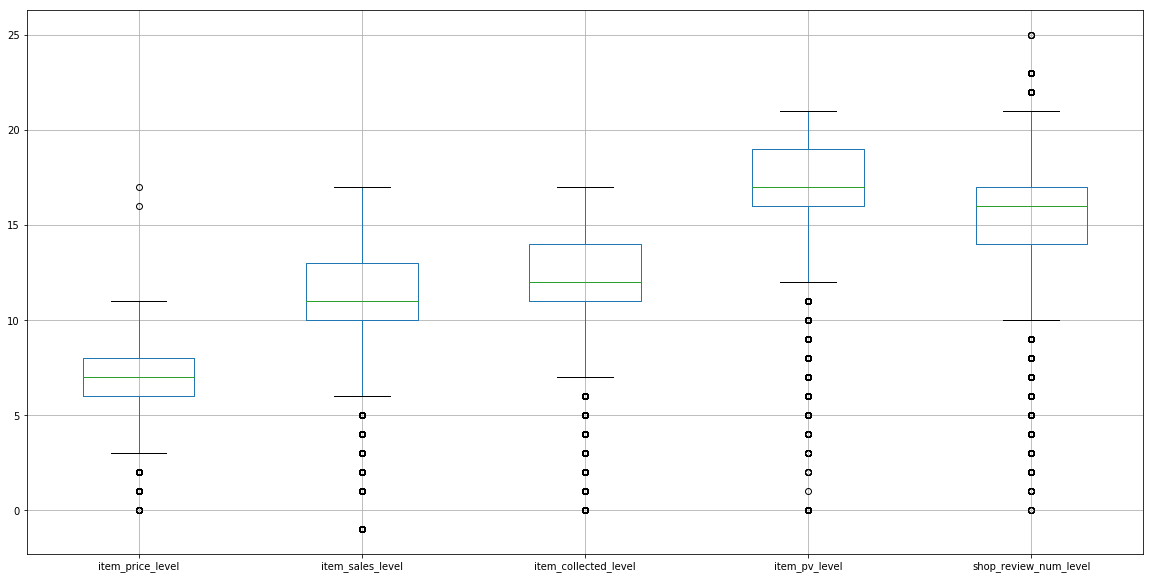

In [9]:
# level 数据箱线图,  level其实可以不算是连续型
ser_list1 = ['item_price_level', 'item_sales_level', 'item_collected_level', 'item_pv_level', 'shop_review_num_level']
train_df[ser_list1].boxplot(figsize=(20, 10))

#### int 分桶型分布

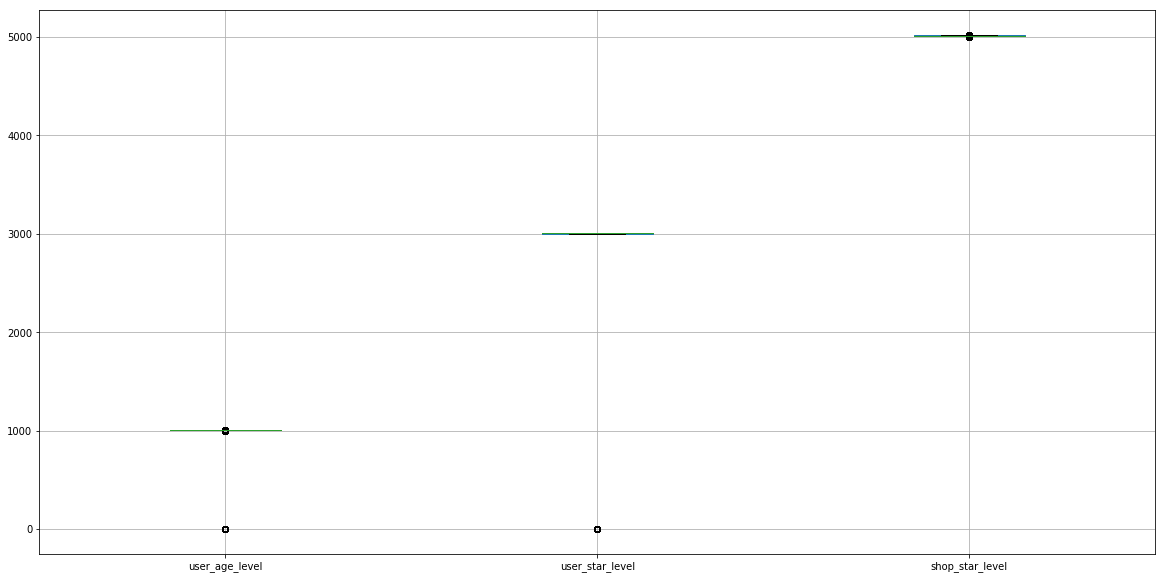

In [11]:
# 直接onehot即可
ser_list2 = ['user_age_level', 'user_star_level', 'shop_star_level']
train_df[ser_list2].boxplot(figsize=(20, 10))

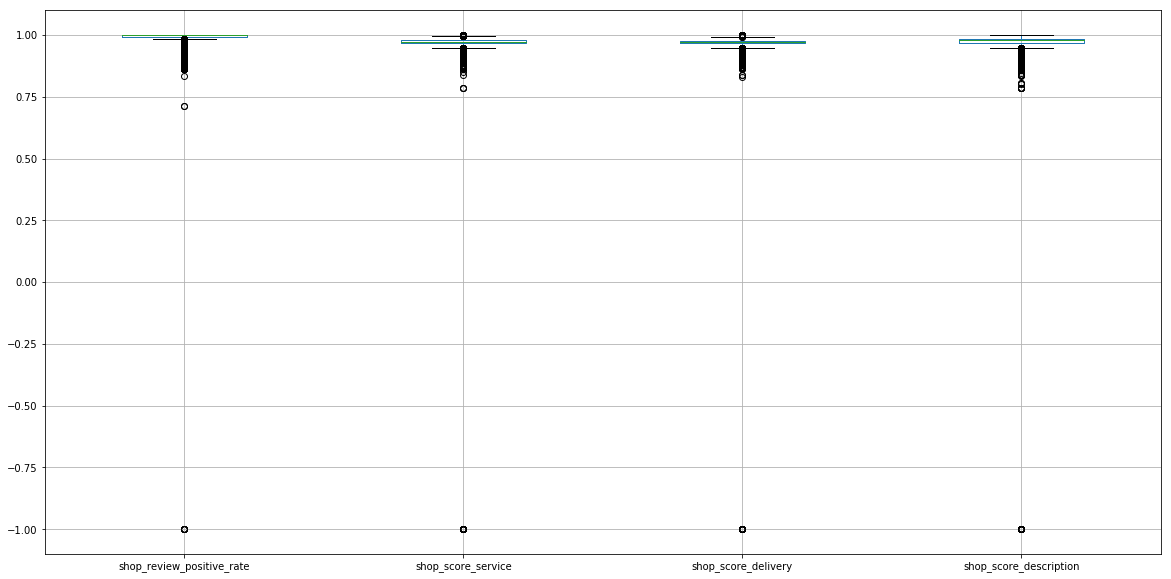

In [12]:
# 去掉异常值即可
ser3_list = ['shop_review_positive_rate', 'shop_score_service', 'shop_score_delivery', 'shop_score_description']
train_df[ser3_list].boxplot(figsize=(20,10))

#### Double型数据分布

In [14]:
train_df.describe()

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,context_timestamp,context_page_id,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
count,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,478138.000000,478138.00000,478138.000000,478138.000000,4.781380e+05,478138.000000,...,4.781380e+05,478138.000000,4.781380e+05,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000
mean,4.613082e+18,4.594622e+18,4.838444e+18,5.500420e+18,6.777175,11.13384,12.199336,17.128676,4.609864e+18,0.213047,...,1.537502e+09,4003.362366,4.733842e+18,15.768353,0.994830,5013.175240,0.971124,0.970497,0.974863,0.018867
std,2.663448e+18,2.710140e+18,2.694756e+18,2.464881e+18,1.089037,2.58886,2.497312,2.160745,2.663355e+18,0.514699,...,1.726222e+05,4.019709,2.596118e+18,2.825294,0.011972,2.590989,0.023817,0.023776,0.025024,0.136055
min,3.823219e+12,6.964907e+14,-1.000000e+00,-1.000000e+00,0.000000,-1.00000,0.000000,0.000000,2.477979e+13,-1.000000,...,1.537200e+09,4001.000000,1.543560e+15,0.000000,-1.000000,4999.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.308543e+18,2.251088e+18,2.357806e+18,3.948283e+18,6.000000,10.00000,11.000000,16.000000,2.302761e+18,0.000000,...,1.537351e+09,4001.000000,2.498543e+18,14.000000,0.992779,5012.000000,0.966360,0.965684,0.969268,0.000000
50%,4.613478e+18,4.636270e+18,5.051040e+18,6.738284e+18,7.000000,11.00000,12.000000,17.000000,4.608490e+18,0.000000,...,1.537506e+09,4001.000000,4.629590e+18,16.000000,1.000000,5013.000000,0.972347,0.971590,0.978493,0.000000
75%,6.920994e+18,7.007158e+18,7.565625e+18,7.534239e+18,8.000000,13.00000,14.000000,19.000000,6.914375e+18,0.000000,...,1.537635e+09,4004.000000,6.740687e+18,17.000000,1.000000,5015.000000,0.977822,0.976978,0.983640,0.000000
max,9.223362e+18,9.221980e+18,9.222396e+18,9.151271e+18,17.000000,17.00000,17.000000,21.000000,9.223345e+18,2.000000,...,1.537805e+09,4020.000000,9.220773e+18,25.000000,1.000000,5020.000000,1.000000,1.000000,1.000000,1.000000


## 时间序列id分析

#### 一, id每天新增 
1. user_id
2. item_id
...

分析每天新增的数据里, id的新增有多少

#### 二, 时间分布
1. 展示高峰时间
2. 购买高峰时间

In [15]:
# 时间处理: 分离天, 星期几, 上中下午/晚上, 小时数

from datetime import datetime

def extract_date(x):
    d = datetime.fromtimestamp(x)
    return d.strftime('%Y-%m-%d')
def extract_weekday(x):
    d = datetime.fromtimestamp(x)
    return d.weekday()
def extract_hour(x):
    d = datetime.fromtimestamp(x)
    return d.hour

train_df['date'] = train_df['context_timestamp'].apply(lambda x: extract_date(x))
train_df['weekday'] = train_df['context_timestamp'].apply(lambda x: extract_weekday(x))
train_df['hour'] = train_df['context_timestamp'].apply(lambda x: extract_hour(x))

In [17]:
##############################
# 物品每天投放数量以及每天新增数量
%run src/util/time_utils.py
import seaborn as sns
sns.set()

def printBarStack(left, right, left_tit, right_tit):
    import pandas as pd
    joined = pd.merge(left, right, on='date')
    joined.columns = ['date', left_tit, right_tit]
    joined.set_index('date').plot(kind='bar', stacked=True)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe5 in position 48: ordinal not in range(128)

In [18]:
# 物品每天投放数量以及每天新增数量
item_id_acc = getColUvByDate(train_df, '2018-09-18', 'date', 'item_id', 7, True)
item_id_sin = getColUvByDate(train_df, '2018-09-18', 'date', 'item_id', 0, True)
printBarStack(item_id_sin, item_id_acc, 'item_count', 'item_new_count')

# 物品每天投放数量以及每天新增数量(未交易情况)
item_id_acc = getColUvByDate(train_df, '2018-09-18', 'date', 'item_id', 7, (train_df['is_trade'] == 0))
item_id_sin = getColUvByDate(train_df, '2018-09-18', 'date', 'item_id', 0, (train_df['is_trade'] == 0))
printBarStack(item_id_sin, item_id_acc, 'item_count', 'item_new_count')

# 物品每天投放数量以及每天新增数量(有交易情况)
item_id_acc = getColUvByDate(train_df, '2018-09-18', 'date', 'item_id', 7, (train_df['is_trade'] == 1))
item_id_sin = getColUvByDate(train_df, '2018-09-18', 'date', 'item_id', 0, (train_df['is_trade'] == 1))
printBarStack(item_id_sin, item_id_acc, 'item_count', 'item_new_count')

NameError: name 'getColUvByDate' is not defined

In [19]:
################################
# 用户每天个数以及每天新增数量


user_id_acc = getColUvByDate(train_df, '2018-09-18', 'date', 'user_id', 7, True)
user_id_sin = getColUvByDate(train_df, '2018-09-18', 'date', 'user_id', 0, True)
printBarStack(user_id_sin, user_id_acc, 'user_count', 'user_new_count')

# 未交易
user_id_acc1 = getColUvByDate(train_df, '2018-09-18', 'date', 'user_id', 7, (train_df['is_trade'] == 0))
user_id_sin1 = getColUvByDate(train_df, '2018-09-18', 'date', 'user_id', 0, (train_df['is_trade'] == 0))
printBarStack(user_id_sin1, user_id_acc1, 'user_count', 'user_new_count')

# 已交易
user_id_acc2 = getColUvByDate(train_df, '2018-09-18', 'date', 'user_id', 7, (train_df['is_trade'] == 1))
user_id_sin2 = getColUvByDate(train_df, '2018-09-18', 'date', 'user_id', 0, (train_df['is_trade'] == 1))
printBarStack(user_id_sin2, user_id_acc2, 'user_count', 'user_new_count')

NameError: name 'getColUvByDate' is not defined

In [20]:
# 商店新增数量
user_id_acc2 = getColUvByDate(train_df, '2018-09-18', 'date', 'shop_id', 7, (train_df['is_trade'] == 0))
user_id_sin2 = getColUvByDate(train_df, '2018-09-18', 'date', 'shop_id', 0, (train_df['is_trade'] == 0))
printBarStack(user_id_sin2, user_id_acc2, 'user_count', 'user_new_count')

user_id_acc2 = getColUvByDate(train_df, '2018-09-18', 'date', 'shop_id', 7, (train_df['is_trade'] == 1))
user_id_sin2 = getColUvByDate(train_df, '2018-09-18', 'date', 'shop_id', 0, (train_df['is_trade'] == 1))
printBarStack(user_id_sin2, user_id_acc2, 'user_count', 'user_new_count')

NameError: name 'getColUvByDate' is not defined

In [21]:
# brand新增数量
id_acc1 = getColUvByDate(train_df, '2018-09-18', 'date', 'item_brand_id', 7, (train_df['is_trade'] == 0))
id_sin1 = getColUvByDate(train_df, '2018-09-18', 'date', 'item_brand_id', 0, (train_df['is_trade'] == 0))
printBarStack(id_sin1, id_acc1, 'item_brand_count', 'item_brand_new_count')

id_acc2 = getColUvByDate(train_df, '2018-09-18', 'date', 'item_brand_id', 7, (train_df['is_trade'] == 1))
id_sin2 = getColUvByDate(train_df, '2018-09-18', 'date', 'item_brand_id', 0, (train_df['is_trade'] == 1))
printBarStack(id_sin2, id_acc2, 'item_brand_count', 'item_brand_new_count')

NameError: name 'getColUvByDate' is not defined

In [22]:
a= getColUvByDate(train_df, '2018-09-18', 'date', 'instance_id', 0)

NameError: name 'getColUvByDate' is not defined

In [ ]:
a

In [ ]:
train_df[:78261]['date']